In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
data.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [6]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


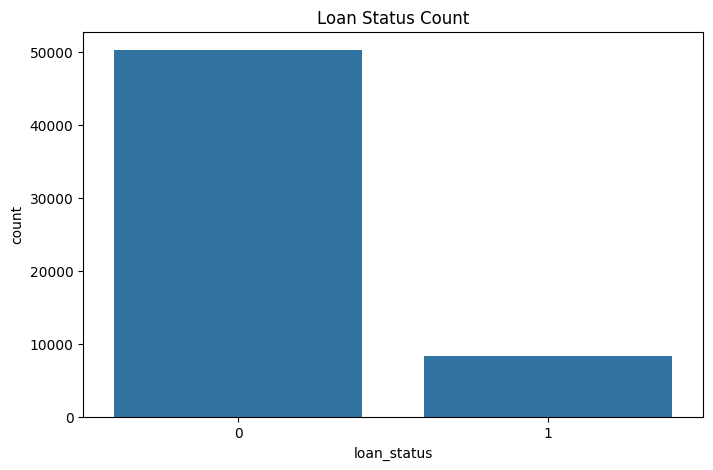

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='loan_status',data=data)
plt.title('Loan Status Count')
plt.show()

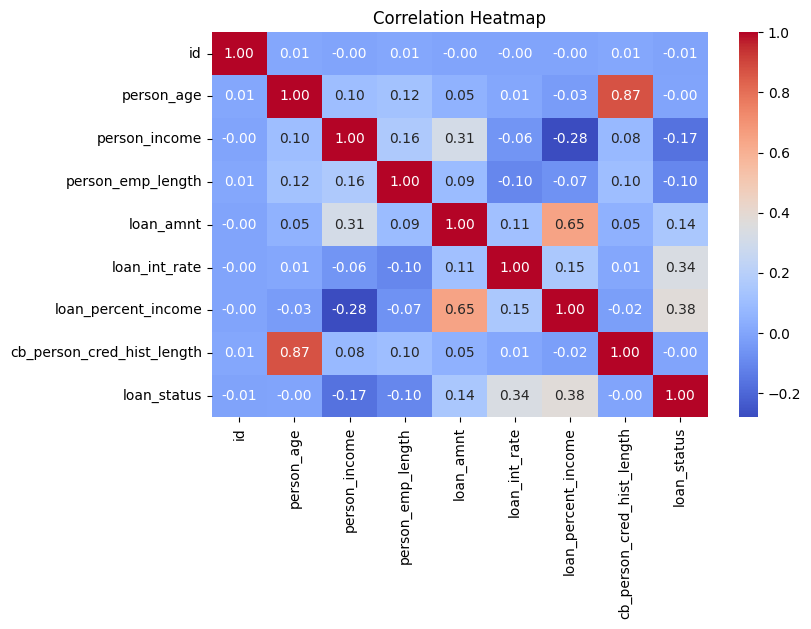

In [13]:
numeric_data=data.select_dtypes(include=[float,int])
plt.figure(figsize=(8,5))
corr=numeric_data.corr()
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
data=pd.get_dummies(data,drop_first=True)
x=data.drop('loan_status',axis=1)
y=data['loan_status']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(x_train,y_train)
y_pred=rf_classifier.predict(x_test)

In [20]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9510614715662035


In [22]:
clasification=classification_report(y_test,y_pred)
print('Classification Report:\n',clasification)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.91      0.72      0.80      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



In [23]:
con_mat=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n',con_mat)

Confusion Matrix:
 [[9976  111]
 [ 463 1179]]


In [24]:
test_data=pd.read_csv('test.csv')

In [25]:
test_data=pd.get_dummies(test_data,drop_first=True)

In [26]:
y_pred=rf_classifier.predict(test_data)

In [28]:
submission=pd.DataFrame({'Id':test_data['id'],'loan_status':y_pred})
submission.to_csv('submission.csv',index=False)

In [29]:
submission.head()

,Id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0
